In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime 

In [2]:
df1 = pd.read_csv("nintendo_twitter_scores_monday.csv")
df2 = pd.read_csv("nintendo_twitter_scores_tuesday.csv")

In [3]:
df1 = df1.rename(columns={"0": 'created_at', "1": "tweet"})
df2 = df2.rename(columns={"0": 'created_at', "1": "tweet"})

In [4]:
df = df1.append(df2, ignore_index=True)

In [5]:
df = df.drop_duplicates(subset="tweet")

In [6]:
df['created_at'] = df['created_at'].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [7]:
df["date"] = df['created_at'].map(lambda x: datetime.date(x))
df["time"] = df['created_at'].map(lambda x: datetime.time(x))
df["hour"] = df['time'].map(lambda x: x.hour)
df['day'] = df['date'].map(lambda x: x.day)

In [8]:
monday = df[df["day"] == 18]
tuesday = df[df["day"] == 19]

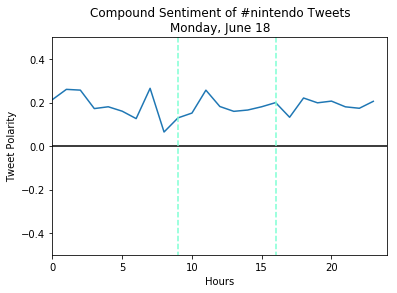

In [9]:
# plot Monday's tweet polarity

#create grouped dataframes
monday_means = monday.groupby(monday['hour']).mean()
monday_means = monday_means.reset_index()

plt.plot(monday_means['hour'], monday_means['compound'])
plt.ylim(-0.5,0.5)
plt.xlim(0,24)
plt.hlines(0, 0, 24)
plt.axvline(9, 1, -1, c='aquamarine', linestyle='dashed')
plt.axvline(16, 1, -1, c='aquamarine', linestyle='dashed')
plt.title("Compound Sentiment of #nintendo Tweets\nMonday, June 18")
plt.xlabel("Hours")
plt.ylabel("Tweet Polarity")

plt.savefig('nintendo_polarity_monday.png')

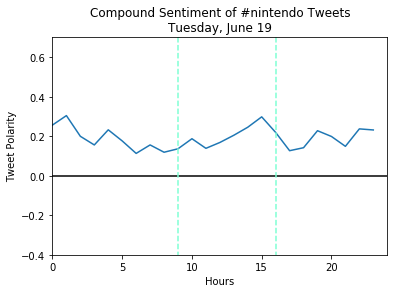

In [10]:
# plot Tuesday's tweet polarity

#create grouped dataframes
tuesday_means = tuesday.groupby(tuesday['hour']).mean()
tuesday_means = tuesday_means.reset_index()

plt.plot(tuesday_means['hour'], tuesday_means['compound'])
plt.ylim(-0.4,0.7)
plt.xlim(0,24)
plt.hlines(0, 0, 24)
plt.axvline(9, 1, -1, c='aquamarine', linestyle='dashed')
plt.axvline(16, 1, -1, c='aquamarine', linestyle='dashed')
plt.title("Compound Sentiment of #nintendo Tweets\nTuesday, June 19")
plt.xlabel("Hours")
plt.ylabel("Tweet Polarity")

plt.savefig('nintendo_polarity_tuesday.png')